In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
%matplotlib tk

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [8]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [9]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [10]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [11]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

In [12]:
%matplotlib inline

In [68]:
p1 = load_polygon(filename = "p1.json")


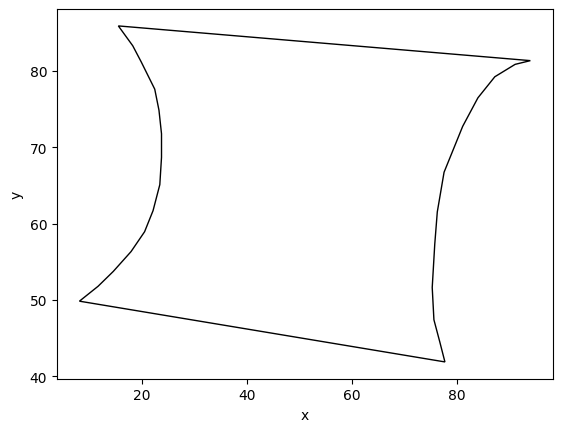

In [69]:
draw_polygon(p1)

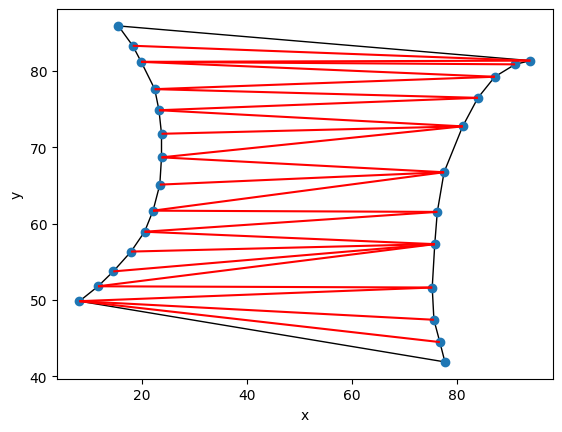

In [70]:
t = triangulation(p1)
draw_polygon_tri(p1, [(p1[x], p1[y]) for (x, y) in t])

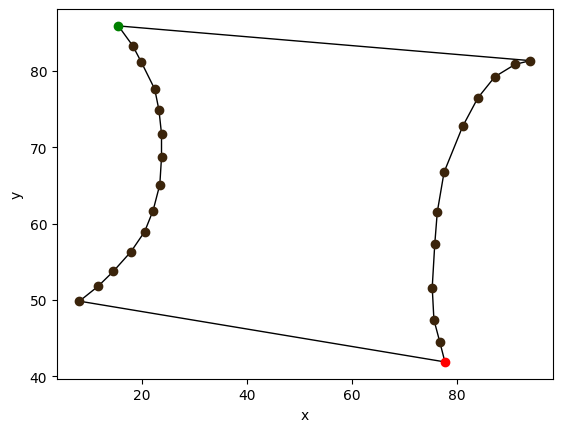

In [71]:
draw_polygon_colors(p1,color_vertex(p1))

### Przykładowy wielokąt $y$-monotoniczny

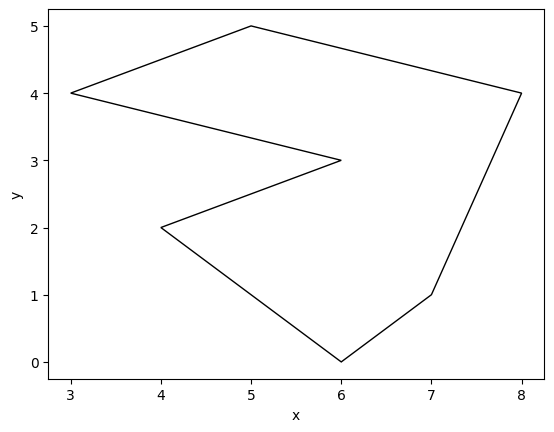

In [19]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [13]:
polygon_monotone = [
    (0, 0),   # Dół lewo
    (4, 0),   # Dół prawo
    (4, 4),   # Góra prawo (ściana)
    (2, 6),   # Szczyt dachu
    (0, 4)    # Góra lewo (ściana)
]

In [14]:
# Litera M
polygon_with_merge = [
    (0, 0),
    (10, 0),
    (10, 10),
    (5, 5),
    (0, 10)
]

In [15]:
# Odwrócone wcięcie (Split)
polygon_with_split = [
    (0, 10),    # Góra lewo
    (0, 0),     # Dół lewo
    (5, 5),     # !!! Wierzchołek Dzielący (Split) - wcięcie w górę
    (10, 0),    # Dół prawo
    (10, 10)    # Góra prawo
]

In [16]:
polygon = polygon_monotone

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [17]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    vertex_types = color_vertex(polygon)
    
# jesli jest wierzcholek laczacy lub dzielacy to sie nie jest y-monotonic
    if 2 in vertex_types or 3 in vertex_types:
        return False
    
    return True
    
    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji.

In [18]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


Sprawdź monotoniczność swojego wielokątu.

In [19]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

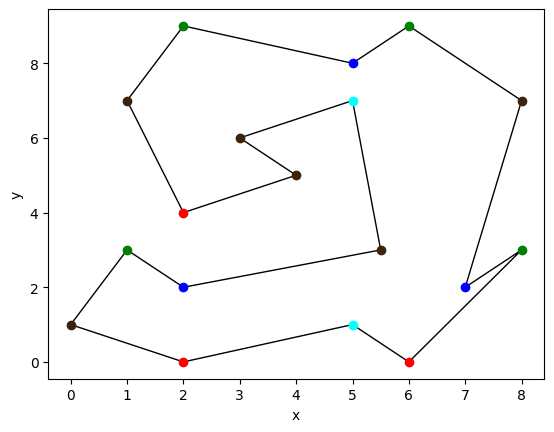

In [20]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [25]:
def color_vertex(polygon):
    """
    Klasyfikacja wierzchołków:
    0: Początkowy (Start) - oba niżej, wypukły
    1: Końcowy (End)      - oba wyżej, wypukły
    2: Łączący (Merge)    - oba wyżej, wklęsły
    3: Dzielący (Split)   - oba niżej, wklęsły
    4: Prawidłowy (Regular) - mieszane
    """
    n = len(polygon)
    
    def det(b, p, a):
        return (p[0] - b[0]) * (a[1] - b[1]) - (p[1] - b[1]) * (a[0] - b[0])

    def vertex_type(b, p, a):
        d = det(b, p, a)
        
        
        b_lower = b[1] < p[1]
        a_lower = a[1] < p[1]
        
        # Obaj sąsiedzi poniżej
        if b_lower and a_lower:
            # Jeśli skręt w lewo (det > 0) -> Kąt < 180 -> Start
            if d > 0: return 0
            # Jeśli skręt w prawo (det < 0) -> Kąt > 180 -> Split
            else: return 3
            
        # Obaj sąsiedzi powyżej
        elif not b_lower and not a_lower:
            # Jeśli skręt w lewo (det > 0) -> Kąt < 180 -> End
            if d > 0: return 1
            # Jeśli skręt w prawo (det < 0) -> Kąt > 180 -> Merge
            else: return 2
            
        # Jeden wyżej, drugi niżej
        else:
            return 4

    res = [None] * n

    for i in range(n):
        before = polygon[(i - 1) % n]
        pkt = polygon[i]
        after = polygon[(i + 1) % n]
        
        res[i] = vertex_type(before, pkt, after)

    return res


    
    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji. 

In [26]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.002s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

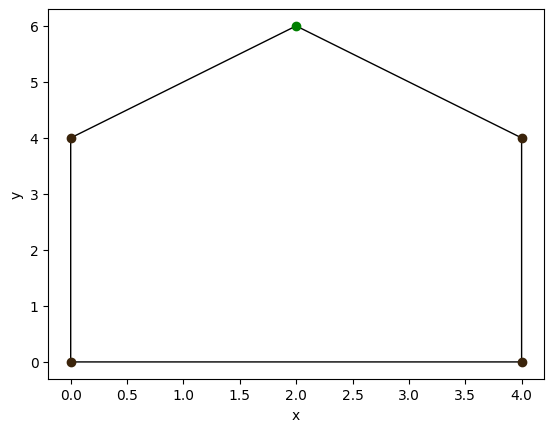

In [32]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

In [33]:
colors = color_vertex(p1)
draw_polygon_colors(p1,colors)

NameError: name 'p1' is not defined

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

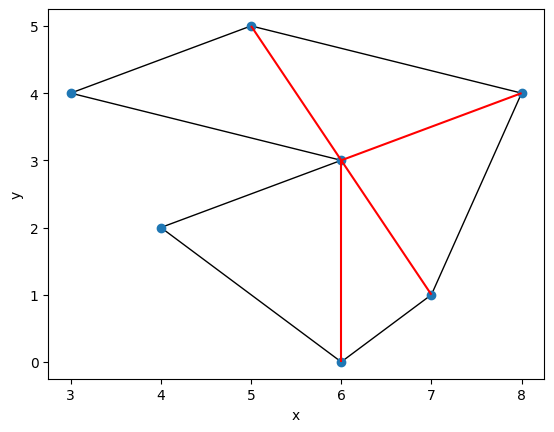

In [34]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [50]:
def triangulation(polygon, eps=1e-9):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów (x, y) podanych CCW
    :return: tablica krotek przekątnych (indeks1, indeks2)
    """
    # dodac druga rprezentacje triangulacji, np moze jako krotka (a, b, c) gdzie a b c to indeksy wirzcholkow?
    # + np reprezentacja trojkatow (ab, ac, bc) przekatnych, nowa funkcje dopisac ktora stworzy ta reprezentacje
    # do przekatnych dodajemy po prostu wszystkie boki i wsm mamy tak jakby cala triangulacje (mampyjakby wtedy kompletny graf)
    
    n = len(polygon)
    diagonals = []

    if not is_y_monotonic(polygon):
        print("Błąd: Wielokąt nie jest y-monotoniczny. Triangulacja niemożliwa tym algorytmem.")
        return []

    def orient(a, b, c):
        return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0])

    # czy wierzcholki są sąsiednie
    def are_adjacent(i, j):
        # bo zadane ccw
        return abs(i - j) == 1 or abs(i - j) == n - 1# bo i, j to indeksy
    
    top_idx = 0
    bottom_idx = 0
    for i in range(1, n):
        if polygon[i][1] > polygon[top_idx][1] or (abs(polygon[i][1] - polygon[top_idx][1]) < eps and polygon[i][0] < polygon[top_idx][0]):
            top_idx = i
        if polygon[i][1] < polygon[bottom_idx][1] or (abs(polygon[i][1] - polygon[bottom_idx][1]) < eps and polygon[i][0] > polygon[bottom_idx][0]):
            bottom_idx = i

    left_chain = []
    curr = top_idx
    while curr != bottom_idx:
        left_chain.append((polygon[curr], curr))
        curr = (curr + 1) % n
    left_chain.append((polygon[bottom_idx], bottom_idx))

    right_chain = []
    curr = top_idx
    while curr != bottom_idx:
        curr = (curr - 1 + n) % n
        if curr == bottom_idx: break
        right_chain.append((polygon[curr], curr))

    sorted_verts = []
    left_chain_indices = set()
    for pt, idx in left_chain:
        left_chain_indices.add(idx)

    L = left_chain[1:]
    R = right_chain

    sorted_verts.append((polygon[top_idx], top_idx))

    i = 0
    j = 0
    while i < len(L) and j < len(R):
        pt_l = L[i][0]
        pt_r = R[j][0]

        if pt_l[1] > pt_r[1] or (abs(pt_l[1] - pt_r[1]) < eps and pt_l[0] < pt_r[0]):
            sorted_verts.append(L[i])
            i += 1
        else:
            sorted_verts.append(R[j])
            j += 1

    while i < len(L):
        sorted_verts.append(L[i])
        i += 1
    while j < len(R):
        sorted_verts.append(R[j])
        j += 1
        
    S = [sorted_verts[0], sorted_verts[1]]

    for k in range(2, n):
        curr_pt, curr_idx = sorted_verts[k]
        
        top_stack = S[-1] # Wierzchołek na szczycie stosu
        curr_is_left = curr_idx in left_chain_indices
        top_is_left = top_stack[1] in left_chain_indices
        
        # rozne lancuchy
        if curr_is_left != top_is_left:
            while len(S) > 0:
                node = S.pop()
                # Dodajemy przekątną, jeśli to nie sąsiedzi
                if not are_adjacent(curr_idx, node[1]):
                    diagonals.append((curr_idx, node[1]))
            
            # na stosie zostaja top_stack w momencie wejścia do ifa i bieżący
            S.append(top_stack)
            S.append((curr_pt, curr_idx))
        # te same łancuchy
        else:
            last_popped = S.pop()
            
            while len(S) > 0:
                peek = S[-1] # Podglądamy następny
                
                # Sprawdzamy "legalność" trójkąta
                # Kolejność dla orient: (Nowy, Ostatni_Zdjęty, Następny_Na_Stosie)
                # Musi być skręt do wewnątrz wielokąta.
                det = orient(curr_pt, last_popped[0], peek[0])
                is_valid = False
                # lewy łańcuch - skret w prawo, wiec orientacja ujemna
                if curr_is_left:
                    if det < -eps: is_valid = True
                # prawy łańcuch, skret w lewo, wiec orirnt dodatni
                else:
                    if det > eps: is_valid = True
                
                if is_valid:
                    if not are_adjacent(curr_idx, peek[1]):
                        diagonals.append((curr_idx, peek[1]))
                    last_popped = S.pop()
                else:
                    break
            
            S.append(last_popped)
            S.append((curr_pt, curr_idx))

            
    graph = [[] for _ in range(n)]
    
    # Przekątne
    for u, v in diagonals:
        graph[u].append(v)
        graph[v].append(u)
        
    # Krawędzie obwodu
    for i in range(n):
        u, v = i, (i + 1) % n
        graph[u].append(v)
        graph[v].append(u)

    return diagonals#, graph # zakomentowane dla testow, jak chcemy zwrocic graph to wystarczy 
    


Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: wielokąt przechowujemy w tablicy w postaci listy krotek (x, y) w ccw kolejnosci, w algorytmie używamy również stos do algorytmu zamiatania, hash set do klasyfikacji łancuchów (czy dany wiecholek nalezy do lewego łancucha) żeby miec o(1) dostep do tej informacji, oraz konowo zwracamy tablice krotek przekatnych

Przeprowadź testy poprawności powyższej funkcji.


In [51]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.004s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

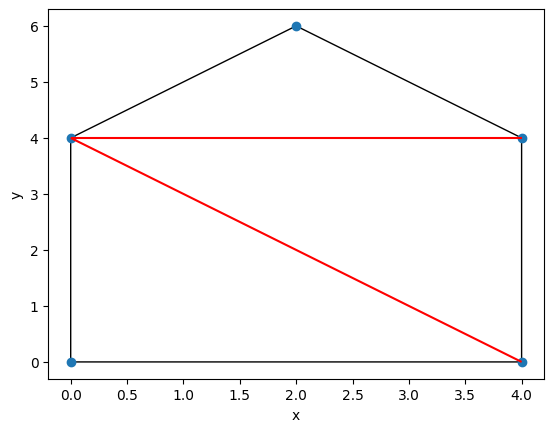

In [37]:
tri = triangulation(polygon)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

In [29]:
def triangulation_draw(polygon):
    """
    Wersja algorytmu triangulacji z pełną wizualizacją (GIF).
    Poprawnie obsługuje logikę stosu (Przypadek A i B).
    """
    vis = Visualizer()
    
    n = len(polygon)
    
    def orient(a, b, c):
        return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0])

    def are_adjacent(i, j):
        return abs(i - j) == 1 or abs(i - j) == n - 1

    points_with_indices = [(polygon[i], i) for i in range(n)]
    sorted_verts = sorted(points_with_indices, key=lambda p: (p[0][1], p[0][0]), reverse=True)

    top_idx = sorted_verts[0][1]
    bottom_idx = sorted_verts[-1][1]
    
    left_chain_indices = set()
    left_chain_indices.add(top_idx)
    curr = (top_idx + 1) % n
    while curr != bottom_idx:
        left_chain_indices.add(curr)
        curr = (curr + 1) % n

    # Rysujemy krawędzie i punkty tła
    edges = [(polygon[i], polygon[(i + 1) % n]) for i in range(n)]
    vis.add_line_segment(edges, color="black")
    vis.add_point(polygon, color="black")

    S = [sorted_verts[0], sorted_verts[1]]
    
    # Markery dla punktów na stosie
    stack_markers = {}
    stack_markers[S[0][1]] = vis.add_point([S[0][0]], color="red")
    stack_markers[S[1][1]] = vis.add_point([S[1][0]], color="red")

    test_line = None # Zmienna na zieloną linię testową

    for k in range(2, n):
        curr_pt, curr_idx = sorted_verts[k]
        
        # Zaznaczamy aktualny punkt na pomarańczowo
        curr_marker = vis.add_point([curr_pt], color="orange")
        
        top_stack = S[-1]
        
        curr_is_left = curr_idx in left_chain_indices
        top_is_left = top_stack[1] in left_chain_indices
        #rozne lancuchy
        if curr_is_left != top_is_left:
            anchor_node = S[-1]
            
            while len(S) > 0:
                node = S.pop()
                
                # Usuwamy marker ze stosu
                if node[1] in stack_markers:
                    vis.remove_figure(stack_markers.pop(node[1]))
                    # Oznaczamy jako przetworzony (żółty)
                    vis.add_point([node[0]], color="yellow")

                # Rysujemy czerwoną przekątną (o ile to nie jest ten sąsiad-kotwica)
                if not are_adjacent(curr_idx, node[1]):
                    vis.add_line_segment((curr_pt, node[0]), color="red")

            S.append(anchor_node)
            S.append((curr_pt, curr_idx))
            
            # Aktualizacja wizualizacji (przywracamy czerwone)
            stack_markers[anchor_node[1]] = vis.add_point([anchor_node[0]], color="red")
            
            vis.remove_figure(curr_marker)
            stack_markers[curr_idx] = vis.add_point([curr_pt], color="red")

        # ten sam lancuch
        else:
            last_popped = S.pop()
            
            # Usuwamy marker ze stosu (tymczasowo)
            if last_popped[1] in stack_markers:
                vis.remove_figure(stack_markers.pop(last_popped[1]))

            while len(S) > 0:
                peek = S[-1] # Baza trójkąta
                #testowa zielona linia
                if test_line: vis.remove_figure(test_line)
                test_line = vis.add_line_segment((curr_pt, peek[0]), color="green")
                
                # sprawdzamy warunek
                det = orient(curr_pt, last_popped[0], peek[0])
                is_valid = False
                eps = 1e-9
                
                if curr_is_left:
                    if det < -eps: is_valid = True
                else:
                    if det > eps: is_valid = True
                #decyzja co robimy z testowa linia
                vis.remove_figure(test_line)
                test_line = None
                
                if is_valid:
                    # sukces, wiec rysujemy czerwona
                    if not are_adjacent(curr_idx, peek[1]):
                        vis.add_line_segment((curr_pt, peek[0]), color="red")
                    
                    vis.add_point([last_popped[0]], color="yellow")
                    
                    last_popped = S.pop()
                    if last_popped[1] in stack_markers:
                        vis.remove_figure(stack_markers.pop(last_popped[1]))
                else:
                    # porazka
                    break
            
            S.append(last_popped)
            S.append((curr_pt, curr_idx))
            
            # Przywracamy kolory czerwone na stosie
            stack_markers[last_popped[1]] = vis.add_point([last_popped[0]], color="red")
            
            vis.remove_figure(curr_marker)
            stack_markers[curr_idx] = vis.add_point([curr_pt], color="red")

    if test_line: vis.remove_figure(test_line)
    
    vis.show()
    return vis

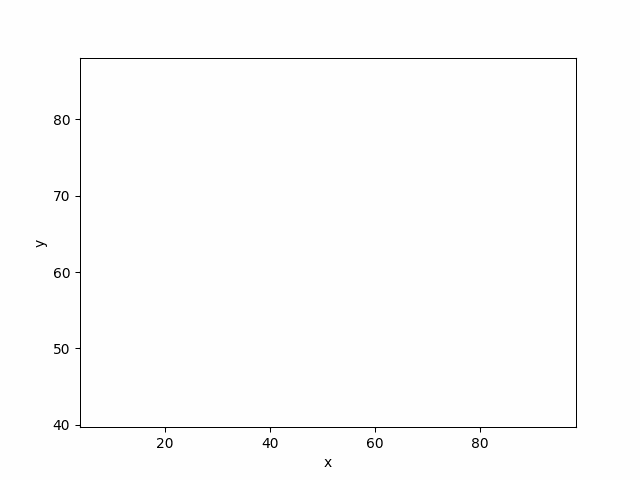

In [214]:
vis = triangulation_draw(p1)
vis.show_gif(interval=400)

In [215]:
vis.save_gif("p1.gif", interval=400)

In [140]:
%matplotlib tk
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import json
import math

class PolygonBuilder:
    def __init__(self):
        self.vertices = []
        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        self.fig.canvas.mpl_connect('key_press_event', self.on_key)
        
        self.ax.set_title("Kliknij, aby dodać punkty.\n'z'-Zapisz, 'o'-Odczyt, 'r'-Reset, 'Enter'-Koniec")
        self.ax.set_xlim(0, 100)
        self.ax.set_ylim(0, 100)
        self.ax.grid(True)
        plt.show()

    def on_click(self, event):
        if event.inaxes != self.ax:
            return
        
        # Lewy przycisk myszy dodaje punkt
        if event.button == 1:
            self.vertices.append((event.xdata, event.ydata))
            self.draw_polygon()

    def on_key(self, event):
        if event.key == 'r': # Reset
            self.vertices = []
            self.draw_polygon()
            print("Wyczyszczono.")
        elif event.key == 'z': # Zapisz
            self.save_to_file()
        elif event.key == 'o': # Odczyt (Open)
            self.load_from_file()
        elif event.key == 'enter': # Zatwierdź / Sprawdź CCW
            self.finalize_polygon()


    def draw_polygon(self):
        self.ax.clear()
        self.ax.set_xlim(0, 100)
        self.ax.set_ylim(0, 100)
        self.ax.grid(True)
        self.ax.set_title(f"Liczba wierzchołków: {len(self.vertices)}")

        if not self.vertices:
            self.fig.canvas.draw()
            return

        xs, ys = zip(*self.vertices)
        self.ax.scatter(xs, ys, color='red')

        if len(self.vertices) > 1:
            self.ax.plot(xs, ys, color='blue')
        
        for i, (x, y) in enumerate(self.vertices):
            self.ax.annotate(str(i), (x, y), xytext=(5, 5), textcoords='offset points')

        self.fig.canvas.draw()
        
    def is_ccw(self):
        """Sprawdza czy wielokąt jest CCW metodą sumy iloczynów wektorowych (Shoelace formula)"""
        if len(self.vertices) < 3:
            return True
        
        sum_edges = 0
        for i in range(len(self.vertices)):
            p1 = self.vertices[i]
            p2 = self.vertices[(i + 1) % len(self.vertices)]
            sum_edges += (p2[0] - p1[0]) * (p2[1] + p1[1])
        
        # Suma < 0 oznacza CCW
        # Suma > 0 oznacza CW
        return sum_edges < 0

    def finalize_polygon(self):
        if len(self.vertices) < 3:
            print("Za mało punktów, by utworzyć wielokąt.")
            return

        # Zamknij wizualnie wielokąt
        xs, ys = zip(*(self.vertices + [self.vertices[0]]))
        self.ax.plot(xs, ys, color='green', linestyle='--')
        
        # Wymuszenie CCW
        if not self.is_ccw():
            print("Wykryto kolejność zgodną z zegarem (CW). Odwracam kolejność na CCW...")
            self.vertices.reverse()
            self.draw_polygon()
            # Rysuj zamknięcie ponownie po odwróceniu
            xs, ys = zip(*(self.vertices + [self.vertices[0]]))
            self.ax.plot(xs, ys, color='green', linestyle='--')
        else:
            print("Kolejność jest poprawna (CCW).")
        
        self.fig.canvas.draw()

    def save_to_file(self, filename="polygon_data.json"):
        if not self.vertices:
            print("Brak danych do zapisania.")
            return
        
        # Zawsze upewnij się przed zapisem, że jest CCW
        self.finalize_polygon()
        
        with open(filename, "w") as f:
            json.dump(self.vertices, f)
        print(f"Zapisano {len(self.vertices)} wierzchołków do pliku '{filename}'.")

    def load_from_file(self, filename="polygon_data.json"):
        try:
            with open(filename, "r") as f:
                self.vertices = json.load(f)
            # Konwersja list na krotki (dla pewności, choć json wczytuje listy)
            self.vertices = [tuple(v) for v in self.vertices]
            print(f"Wczytano wielokąt z pliku '{filename}'.")
            self.draw_polygon()
            self.finalize_polygon() # Od razu zamknij i sprawdź orientację
        except FileNotFoundError:
            print("Nie znaleziono pliku.")

# Uruchomienie aplikacji
if __name__ == "__main__":
    app = PolygonBuilder()


Wyczyszczono.
Kolejność jest poprawna (CCW).
Kolejność jest poprawna (CCW).
Zapisano 13 wierzchołków do pliku 'polygon_data.json'.
Wyczyszczono.
Kolejność jest poprawna (CCW).
Wyczyszczono.
Wyczyszczono.
Wyczyszczono.
Wyczyszczono.
Wyczyszczono.
Wyczyszczono.
Kolejność jest poprawna (CCW).
Kolejność jest poprawna (CCW).
Zapisano 12 wierzchołków do pliku 'polygon_data.json'.
Kolejność jest poprawna (CCW).
Zapisano 12 wierzchołków do pliku 'polygon_data.json'.


In [32]:
import json

def load_polygon(filename="polygon_data.json"):
    """
    Wczytuje wielokąt z pliku JSON i zwraca listę krotek.
    """
    try:
        with open(filename, "r") as f:
            raw_data = json.load(f)
        # Konwersja na listę krotek
        return [tuple(pt) for pt in raw_data]
    except FileNotFoundError:
        print(f"Błąd: Nie znaleziono pliku '{filename}'.")
        return []

In [33]:
%matplotlib inline


In [60]:
p2 = load_polygon(filename = "p2.json")


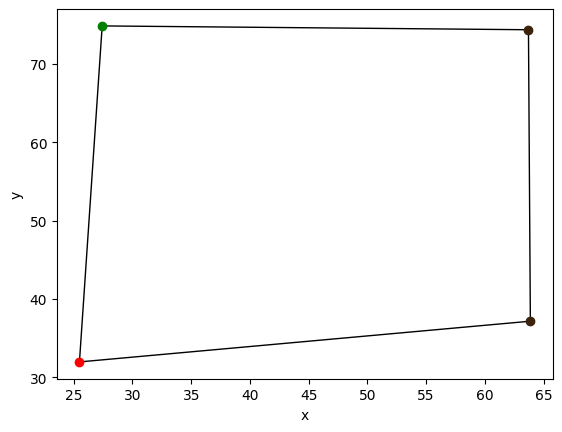

In [61]:
draw_polygon_colors(p2, color_vertex(p2))


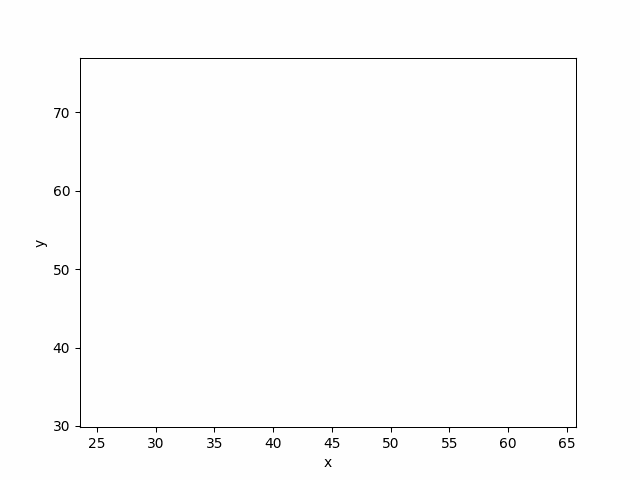

In [228]:
vis = triangulation_draw(p2)
vis.show_gif(interval=400)

In [229]:
vis.save_gif("p2.gif", interval=400)

In [34]:
p3 = load_polygon(filename = "p3.json")


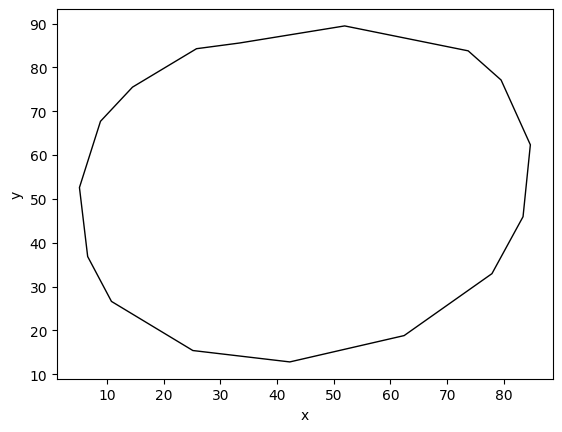

In [35]:
draw_polygon(p3)


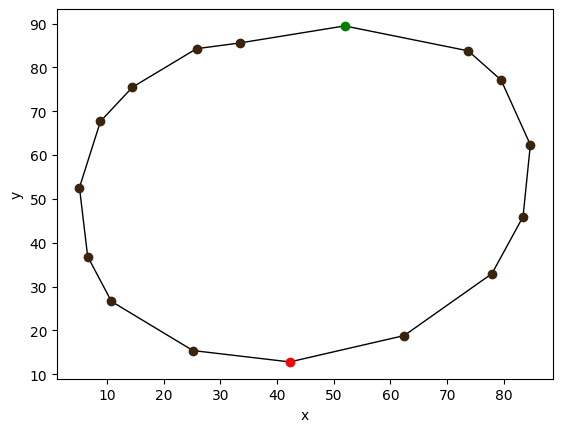

In [63]:
draw_polygon_colors(p3, color_vertex(p3))


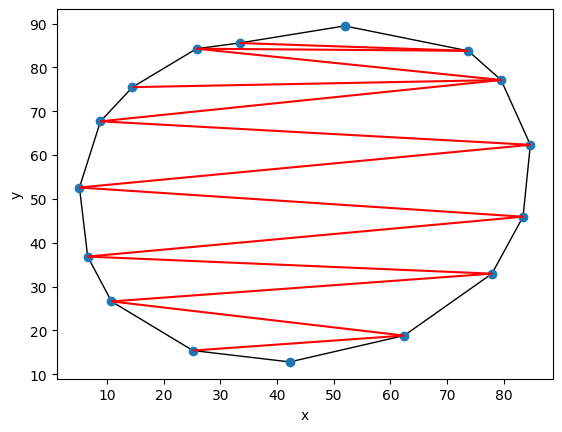

In [37]:
t = triangulation(p3)
draw_polygon_tri(p3, [(p3[x], p3[y]) for (x, y) in t])

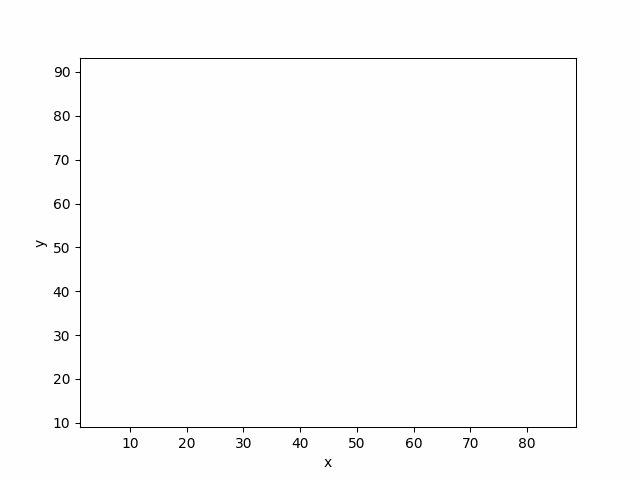

In [235]:
vis = triangulation_draw(p3)
vis.show_gif(interval=400)

In [236]:
vis.save_gif("p3.gif", interval=400)

In [64]:
p4 = load_polygon(filename = "p4.json")


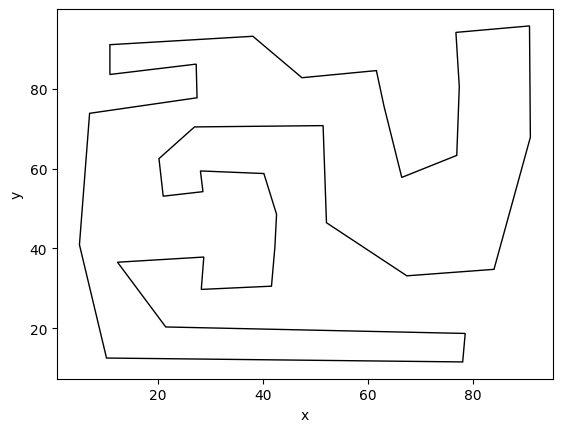

In [65]:
draw_polygon(p4)


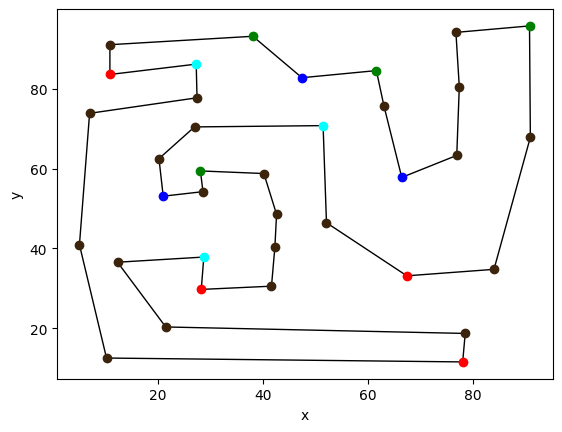

In [51]:
draw_polygon_colors(p4, color_vertex(p4))


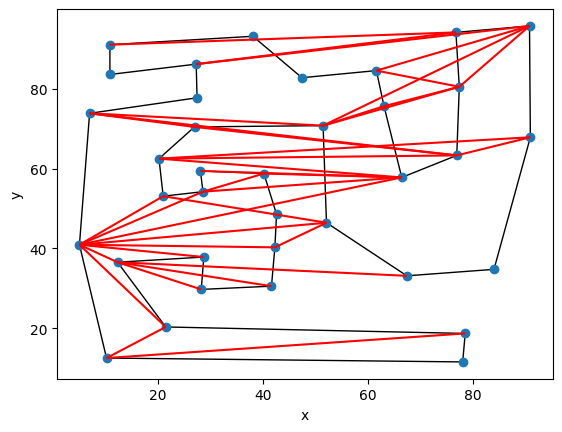

In [52]:
tri = triangulation(p4)
draw_polygon_tri(p4, [(p4[x], p4[y]) for (x, y) in tri])

In [39]:
p5 = load_polygon(filename = "p5.json")


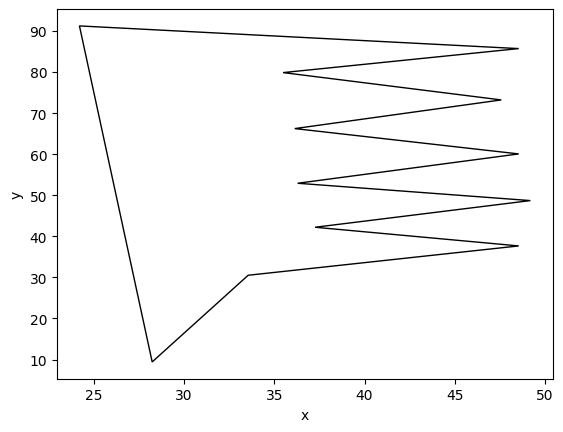

In [57]:
draw_polygon(p5)


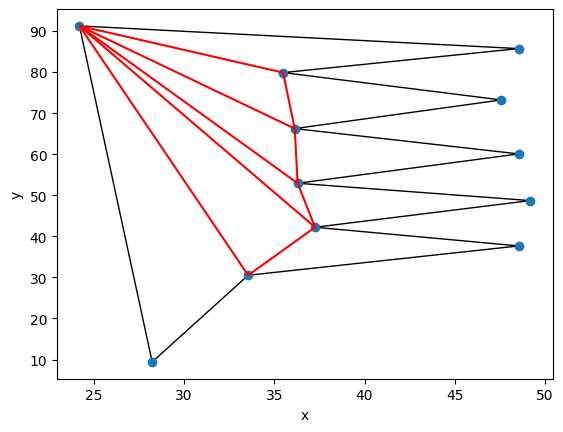

In [40]:
t = triangulation(p5)
draw_polygon_tri(p5, [(p5[x], p5[y]) for (x, y) in t])

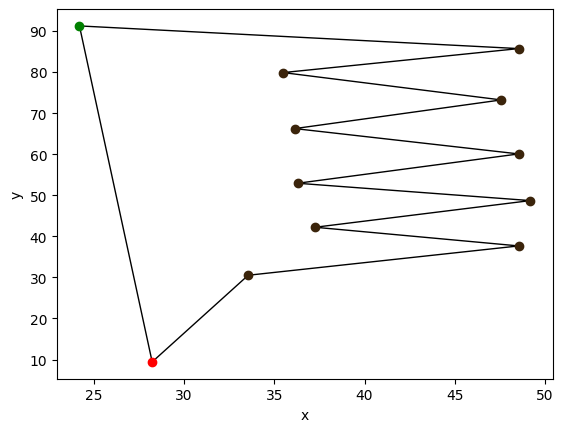

In [42]:
draw_polygon_colors(p5, color_vertex(p5))


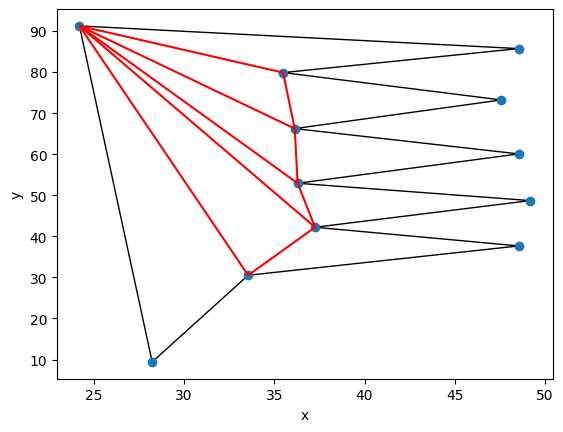

In [43]:
tri = triangulation(p5)
draw_polygon_tri(p5, [(p5[x], p5[y]) for (x, y) in tri])

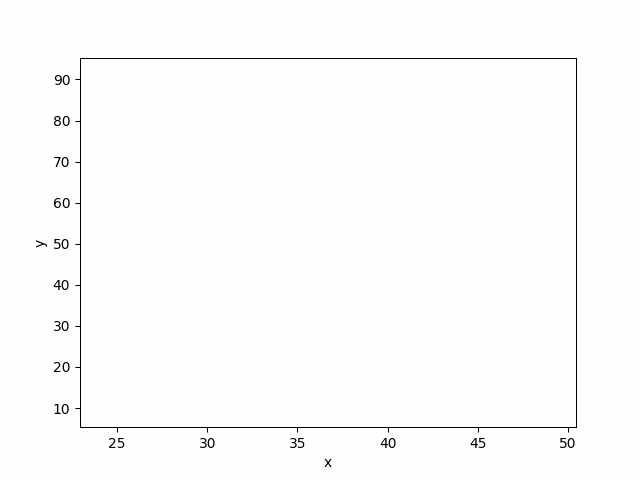

In [44]:
vis = triangulation_draw(p5)
vis.show_gif(interval=400)

In [45]:
vis.save_gif("p5.gif", interval=400)

Time: 0.000s


In [144]:
p6 = load_polygon(filename = "p6.json")


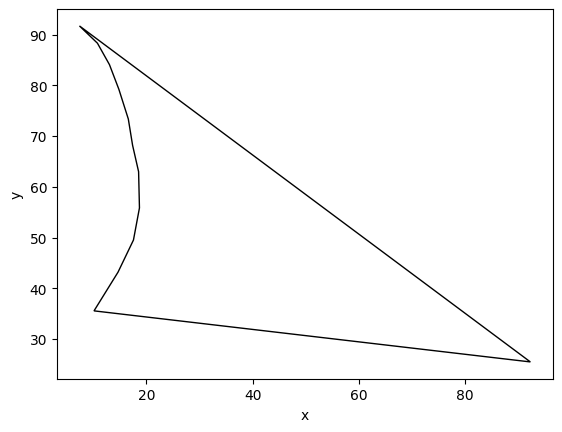

In [145]:
draw_polygon(p6)


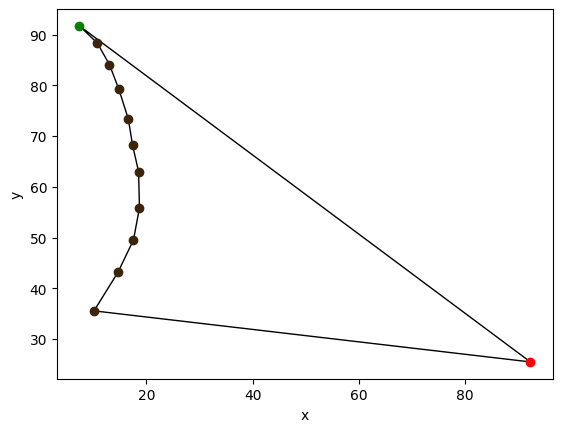

In [146]:
draw_polygon_colors(p6, color_vertex(p6))


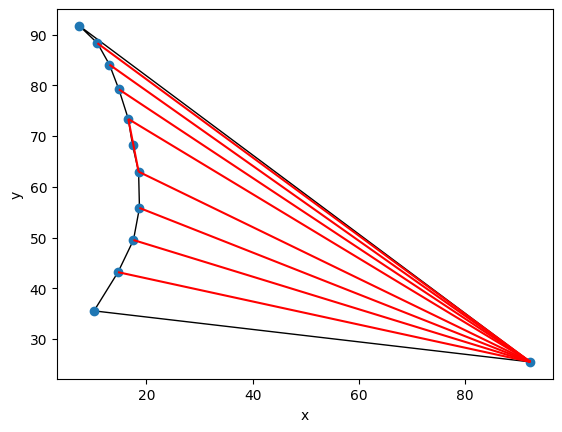

In [147]:
tri = triangulation(p6)
draw_polygon_tri(p6, [(p6[x], p6[y]) for (x, y) in tri])

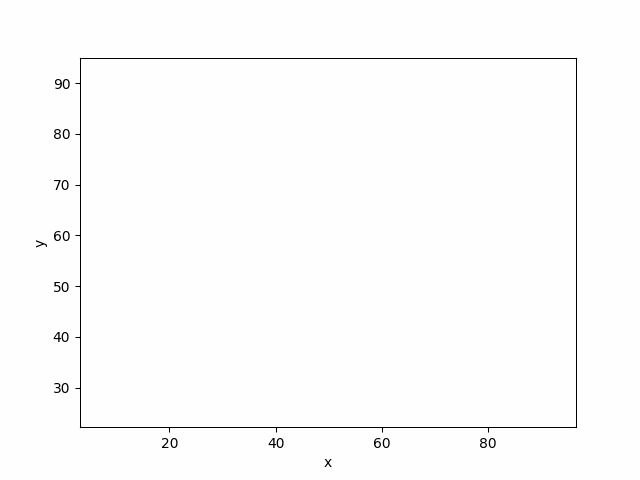

In [148]:
vis = triangulation_draw(p6)
vis.show_gif(interval=400)


In [149]:
#vis.save_gif("p6.gif", interval=400)

In [127]:
p7 = load_polygon(filename = "p7.json")


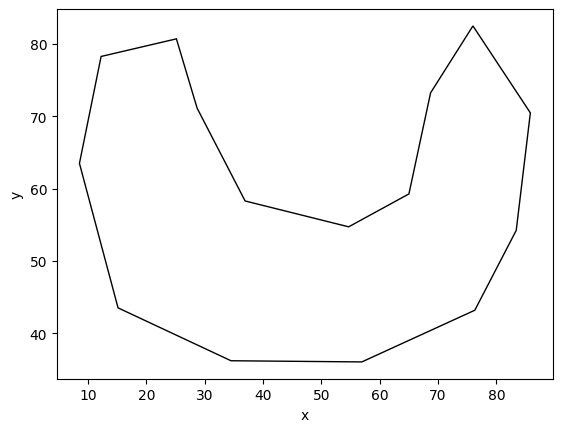

In [130]:
draw_polygon(p7)


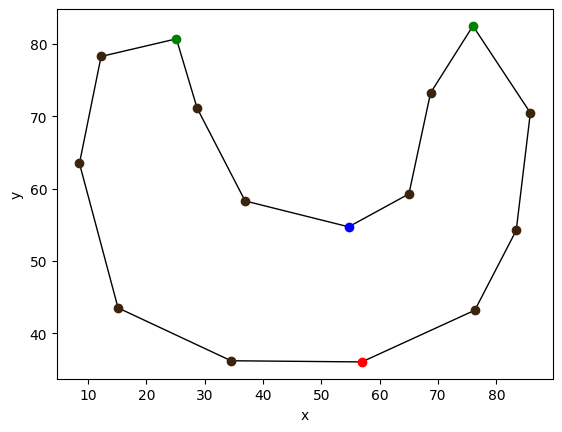

In [131]:
draw_polygon_colors(p7, color_vertex(p7))


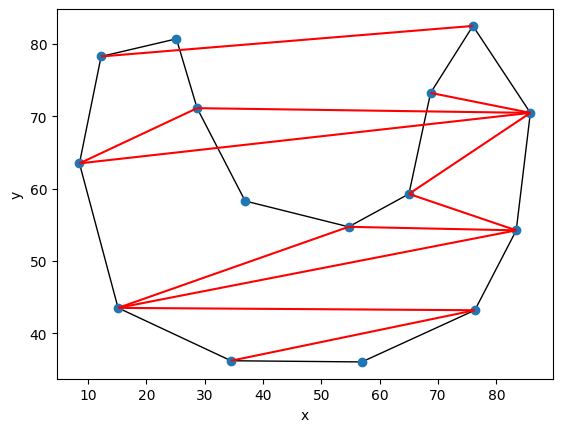

In [132]:
tri = triangulation(p7)
draw_polygon_tri(p7, [(p7[x], p7[y]) for (x, y) in tri])

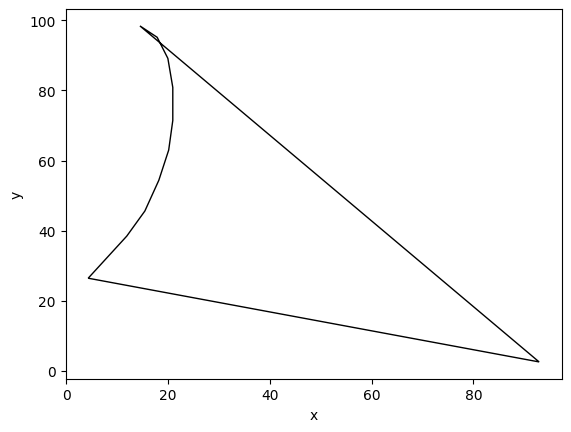

In [139]:
draw_polygon(p6)


In [120]:
vis.save_gif("p6.gif", interval=400)

In [ ]:
%matplotlib inline
p2 = load_polygon()
print(p1)
draw_polygon(p1)
t = triangulation(p1)
draw_polygon_tri(p1, [(p1[x], p1[y]) for (x, y) in t])
draw_polygon_colors(p1,color_vertex(p1))